In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn')

In [2]:
#E2DBBE
#D5D6AA
#9DBBAE
#769FB6
#188FA7

In [3]:
df = pd.read_csv("input/transactions_train.csv")

In [4]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0


In [5]:
df.query('type=="PAYMENT"')['newbalanceDest'].mean()

0.0

In [6]:
df.shape

(6351193, 10)

In [7]:
df['isFraud'].value_counts()

0    6343476
1       7717
Name: isFraud, dtype: int64

In [8]:
df.corr()

,step,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,0.022354,-0.009113,-0.009201,0.028303,0.026508,0.025495
amount,0.022354,1.000000,-0.003543,-0.008153,0.294792,0.460065,0.073346
oldbalanceOrig,-0.009113,-0.003543,1.000000,0.998857,0.066301,0.042019,0.009226
newbalanceOrig,-0.009201,-0.008153,0.998857,1.000000,0.067852,0.041853,-0.008322
oldbalanceDest,0.028303,0.294792,0.066301,0.067852,1.000000,0.976550,-0.005657
newbalanceDest,0.026508,0.460065,0.042019,0.041853,0.976550,1.000000,0.000496
isFraud,0.025495,0.073346,0.009226,-0.008322,-0.005657,0.000496,1.000000


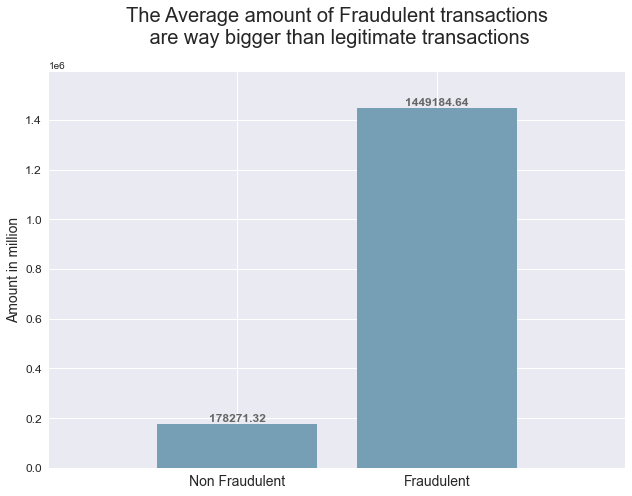

In [9]:
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
mean_fraud = df.loc[df["isFraud"]==1, "amount"].mean()
mean_nonfraud = df.loc[df["isFraud"]==0, "amount"].mean()

ax.bar([0, 1],[mean_nonfraud, mean_fraud], color=['#769FB6'])
plt.xticks([0, 1], ["Non Fraudulent", "Fraudulent"], fontsize=14)
plt.yticks(fontsize=12)
plt.ylabel("Amount in million", fontsize=14)
plt.margins(0.3, 0.1)
plt.subplots_adjust(wspace=5, hspace=10)
plt.title("The Average amount of Fraudulent transactions\n are way bigger than legitimate transactions\n", fontsize=20)

rects = ax.patches

# Make some labels.
labels = [mean_nonfraud, mean_fraud]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    label = round(label, 2)
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom", fontsize=12
         ,fontweight="bold", color="#666"
    )
plt.show()

This is a good variable to use for Fraud detection

In [10]:
df_prev = df.copy()

In [11]:
df['rn'] = df.groupby('nameOrig')['step'].rank(method='first')

In [15]:
# All of the origin accounts with fraudulent records (Victims)
df.loc[df['nameOrig'].isin(df.query('rn > 1 & isFraud == 1')['nameOrig'])].sort_values(['nameOrig', 'rn']).shape

(34, 11)

In [20]:
# How many repeats of fraudulent transaction on nameOrig 
df['_rn'] = df.query('isFraud==1').groupby('nameOrig')['step'].rank(method='first')
df['_rn'].value_counts()

1.0    7717
Name: _rn, dtype: int64

In [21]:
# how many repeats of fraudulent transaction on nameDest
df['_rn2'] = df.query('isFraud==1').groupby('nameDest')['step'].rank(method='first')
df['_rn2'].value_counts()

1.0    7677
2.0      40
Name: _rn2, dtype: int64

In [22]:
df['rn2'] = df.groupby('nameDest')['step'].rank(method='first')

In [23]:
df['cumsum'] = df.groupby(['nameDest', 'step'])['amount'].transform('cumsum')
df.loc[df['nameDest']=="C1496190878"].sort_values(['nameDest', 'step'])

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,rn,_rn,_rn2,rn2,cumsum
882015,42,CASH_IN,280718.22,C1031729180,2667479.30,2948197.52,C1496190878,3.210744e+07,3.182672e+07,0,1.0,NaN,NaN,1.0,2.807182e+05
1031016,93,CASH_OUT,108191.73,C193438573,0.00,0.00,C1496190878,3.182672e+07,3.193491e+07,0,1.0,NaN,NaN,2.0,1.081917e+05
1115220,130,TRANSFER,290402.95,C916089690,0.00,0.00,C1496190878,3.193491e+07,3.222532e+07,0,1.0,NaN,NaN,3.0,2.904030e+05
1249713,134,TRANSFER,349447.56,C1913049323,0.00,0.00,C1496190878,3.222532e+07,3.257476e+07,0,1.0,NaN,NaN,4.0,3.494476e+05
1633048,157,TRANSFER,208664.00,C782320563,0.00,0.00,C1496190878,3.257476e+07,3.278343e+07,0,1.0,NaN,NaN,5.0,2.086640e+05
1852108,164,CASH_OUT,228290.71,C1931649143,0.00,0.00,C1496190878,3.278343e+07,3.301172e+07,0,1.0,NaN,NaN,6.0,2.282907e+05
2078800,182,CASH_OUT,503976.32,C1840149967,2099.36,0.00,C1496190878,3.301172e+07,3.351569e+07,0,1.0,NaN,NaN,7.0,5.039763e+05
2728403,212,TRANSFER,170416.03,C829406884,0.00,0.00,C1496190878,3.351569e+07,3.394767e+07,0,1.0,NaN,NaN,8.0,1.704160e+05
2733562,212,CASH_OUT,261557.93,C627172913,0.00,0.00,C1496190878,3.368611e+07,3.394767e+07,0,1.0,NaN,NaN,9.0,4.319740e+05
2779798,214,CASH_IN,328587.57,C958619815,4238718.25,4567305.82,C1496190878,3.394767e+07,3.361908e+07,0,1.0,NaN,NaN,10.0,3.285876e+05


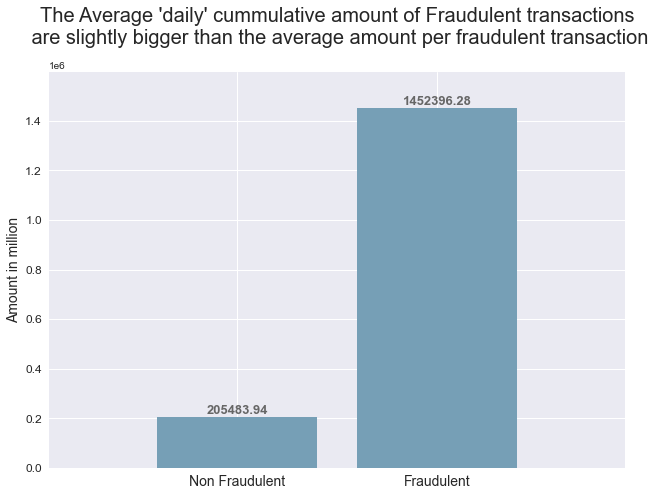

In [24]:
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
mean_fraud = df.loc[df["isFraud"]==1, "cumsum"].mean()
mean_nonfraud = df.loc[df["isFraud"]==0, "cumsum"].mean()

ax.bar([0, 1],[mean_nonfraud, mean_fraud], color=['#769FB6'])
plt.xticks([0, 1], ["Non Fraudulent", "Fraudulent"], fontsize=14)
plt.yticks(fontsize=12)
plt.ylabel("Amount in million", fontsize=14)
plt.margins(0.3, 0.1)
plt.subplots_adjust(wspace=5, hspace=10)
plt.title("The Average 'daily' cummulative amount of Fraudulent transactions\n are slightly bigger than the average amount per fraudulent transaction\n", fontsize=20)

labels = [mean_nonfraud, mean_fraud]

rects = ax.patches
for rect, label in zip(rects, labels):
    height = rect.get_height()
    label = round(label, 2)
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 15, label, ha="center", va="bottom", fontsize=13
        ,fontweight="bold", color="#666"
    )
plt.show()

In [25]:
df["prev_step"] = df.groupby("nameDest")["step"].shift()
df["diff"] = df["step"] - df["prev_step"]


In [26]:
df["nthTransactionForTheHour"] = df.groupby(["nameDest", "step"])['step'].rank(method='first')

In [144]:
df.loc[df['nameDest']=='C1330106945'].head(30)

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,rn,rn2,cumsum,prev_step,diff,nthTransactionForTheHour
68,1,DEBIT,5149.66,C1955990522,4782.00,0.00,C1330106945,52752.00,24044.18,0,1.0,1.0,5149.66,NaN,NaN,1.0
78,1,TRANSFER,42712.39,C283039401,10363.39,0.00,C1330106945,57901.66,24044.18,0,1.0,2.0,47862.05,1.0,0.0,2.0
346,1,DEBIT,3584.21,C833240229,135496.00,131911.79,C1330106945,100614.05,24044.18,0,1.0,3.0,51446.26,1.0,0.0,3.0
393,1,CASH_IN,65912.95,C180316302,640544.28,706457.23,C1330106945,104198.26,24044.18,0,1.0,4.0,117359.21,1.0,0.0,4.0
1478,1,DEBIT,5454.05,C470132045,86214.00,80759.95,C1330106945,18590.13,24044.18,0,1.0,5.0,122813.26,1.0,0.0,5.0
3633,2,CASH_IN,15427.16,C1353756631,5155634.39,5171061.55,C1330106945,24044.18,8617.02,0,1.0,6.0,15427.16,1.0,1.0,1.0
6178,6,DEBIT,3525.54,C1254589807,24708.00,21182.46,C1330106945,8617.02,12142.56,0,1.0,7.0,3525.54,2.0,4.0,1.0
28042,8,CASH_OUT,5160.96,C716195222,0.00,0.00,C1330106945,12142.56,17303.52,0,1.0,8.0,5160.96,6.0,2.0,1.0
61208,9,CASH_IN,270575.80,C1690425378,0.00,270575.80,C1330106945,17303.52,48660.79,0,1.0,9.0,270575.80,8.0,1.0,1.0
78539,10,CASH_OUT,253800.85,C1888951443,19254.00,0.00,C1330106945,0.00,48660.79,0,1.0,10.0,253800.85,9.0,1.0,1.0


In [145]:
df.loc[df['rn2']>1].sort_values(['nameDest', 'step'])

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,rn,rn2,cumsum,prev_step,diff,nthTransactionForTheHour
5032095,354,CASH_OUT,228252.33,C1978911345,953.00,0.00,C1000004082,0.00,228252.33,0,1.0,2.0,228252.33,352.0,2.0,1.0
5219127,370,TRANSFER,1331742.99,C1539355936,11088.00,0.00,C1000004082,228252.33,1559995.31,0,1.0,3.0,1331742.99,354.0,16.0,1.0
5331822,374,CASH_OUT,363030.74,C1680720313,19486.00,0.00,C1000004082,1559995.31,1923026.06,0,1.0,4.0,363030.74,370.0,4.0,1.0
5462768,379,CASH_IN,156015.83,C1185840905,55451.00,211466.83,C1000004082,1923026.06,1767010.23,0,1.0,5.0,156015.83,374.0,5.0,1.0
5659867,396,CASH_IN,23297.19,C984964842,1030993.30,1054290.49,C1000004082,1767010.23,1743713.04,0,1.0,6.0,23297.19,379.0,17.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5599639,394,PAYMENT,15575.11,C486446778,207462.98,191887.88,M994334108,0.00,0.00,0,1.0,2.0,15575.11,159.0,235.0,1.0
3612166,273,PAYMENT,7013.59,C1233653958,0.00,0.00,M994716181,0.00,0.00,0,1.0,2.0,7013.59,11.0,262.0,1.0
1903740,165,PAYMENT,9856.76,C486878934,152240.58,142383.83,M995849630,0.00,0.00,0,1.0,2.0,9856.76,22.0,143.0,1.0
2119013,183,PAYMENT,1645.19,C539662831,152365.23,150720.04,M995979279,0.00,0.00,0,1.0,2.0,1645.19,138.0,45.0,1.0


In [27]:
# All of the destination accounts with fraudulent records and has more than 1 transaction on different "steps" (Culprits)
df_culprit = df.loc[df['nameDest'].isin(df.query('rn2 > 1 & isFraud == 1')['nameDest'])].sort_values(['nameDest', 'rn2'])
df_culprit

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,rn,_rn,_rn2,rn2,cumsum,prev_step,diff,nthTransactionForTheHour
3165860,237,CASH_OUT,72809.55,C1650985602,21369.00,0.00,C1001258143,0.00,72809.55,0,1.0,NaN,NaN,1.0,72809.55,NaN,NaN,1.0
3472350,258,CASH_OUT,204898.53,C1165602651,200134.00,0.00,C1001258143,72809.55,551717.33,0,1.0,NaN,NaN,2.0,204898.53,237.0,21.0,1.0
3473418,258,TRANSFER,274009.25,C2055801845,0.00,0.00,C1001258143,277708.08,551717.33,0,1.0,NaN,NaN,3.0,478907.78,258.0,0.0,2.0
3607015,264,CASH_IN,304705.24,C755335848,11574617.47,11879322.71,C1001258143,551717.33,247012.09,0,1.0,NaN,NaN,4.0,304705.24,258.0,6.0,1.0
4140457,303,CASH_OUT,407097.38,C318179352,9959.00,0.00,C1001258143,247012.09,654109.48,0,1.0,NaN,NaN,5.0,407097.38,264.0,39.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4914502,349,CASH_IN,23377.58,C706021317,5339.00,28716.58,C998349190,144563.84,121186.27,0,1.0,NaN,NaN,2.0,23377.58,303.0,46.0,1.0
5169273,358,CASH_OUT,123557.50,C1086731705,130234.00,6676.50,C998349190,121186.27,244743.77,0,1.0,NaN,NaN,3.0,123557.50,349.0,9.0,1.0
5315613,374,TRANSFER,747046.52,C652973324,10830.00,0.00,C998349190,244743.77,991790.29,0,1.0,NaN,NaN,4.0,747046.52,358.0,16.0,1.0
5761013,400,CASH_OUT,171444.38,C412195467,0.00,0.00,C998349190,991790.29,1163234.67,0,1.0,NaN,NaN,5.0,171444.38,374.0,26.0,1.0


In [147]:
df.loc[(df['nameDest'].isin(df.query('rn2 > 1 & isFraud == 1')['nameDest'])) & df['isFraud']==1].sort_values(['nameDest', 'rn2'])

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,rn,rn2,cumsum,prev_step,diff,nthTransactionForTheHour
6187833,569,CASH_OUT,15093.69,C200350640,15093.69,0.0,C1001258143,700860.28,715953.97,1,1.0,9.0,15093.69,405.0,164.0,1.0
1030266,51,CASH_OUT,339275.64,C433192438,339275.64,0.0,C1002469873,1481576.03,1820851.68,1,1.0,20.0,339275.64,46.0,5.0,1.0
6276611,638,CASH_OUT,43996.54,C103861454,43996.54,0.0,C1002939134,808284.11,852280.66,1,1.0,2.0,43996.54,565.0,73.0,1.0
6282922,656,CASH_OUT,110528.53,C2014517092,110528.53,0.0,C1002952732,600331.95,710860.48,1,1.0,20.0,110528.53,474.0,182.0,1.0
1030570,73,CASH_OUT,400157.86,C1959804825,400157.86,0.0,C1005460442,0.00,400157.86,1,1.0,2.0,400157.86,37.0,36.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4784798,337,CASH_OUT,88748.63,C1502031409,88748.63,0.0,C997271871,664794.37,753543.00,1,1.0,5.0,88748.63,297.0,40.0,1.0
6298398,681,CASH_OUT,807466.16,C344825727,807466.16,0.0,C997289329,103628.07,911094.22,1,1.0,5.0,807466.16,297.0,384.0,1.0
5040726,354,CASH_OUT,375419.35,C273275190,375419.35,0.0,C997789760,269939.49,645358.83,1,1.0,3.0,375419.35,322.0,32.0,1.0
6036302,476,CASH_OUT,37394.15,C534886270,37394.15,0.0,C998024073,281667.87,319062.02,1,1.0,8.0,37394.15,378.0,98.0,1.0


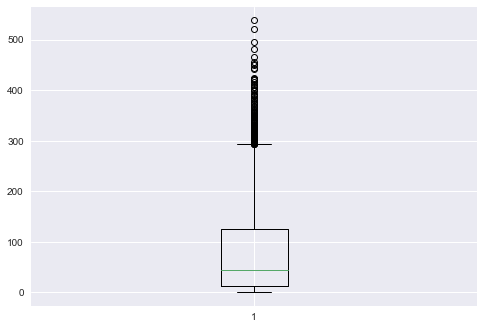

84.86979348967448

In [148]:
plt.boxplot(df.loc[df['isFraud']==1,'diff'].dropna())
plt.show()

df.loc[df['isFraud']==1,'diff'].dropna().mean()

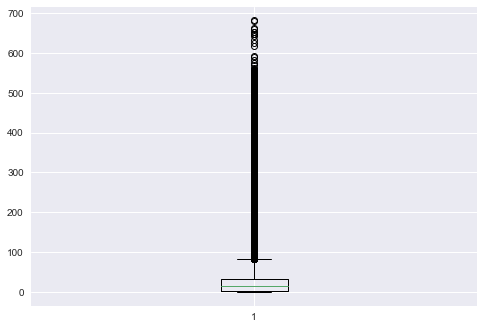

29.891642246262315

In [149]:
plt.boxplot(df.loc[df['isFraud']==0,'diff'].dropna())
plt.show()

df.loc[df['isFraud']==0,'diff'].dropna().mean()

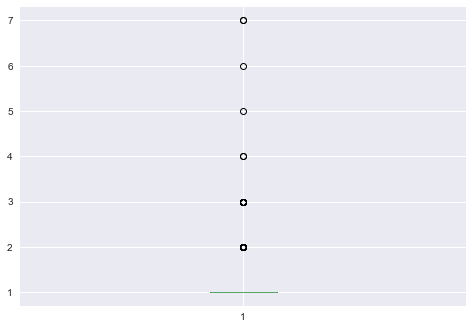

1.069188091828518

In [150]:
plt.boxplot(df.loc[df['isFraud']==1,'nthTransactionForTheHour'].dropna())
plt.show()

df.loc[df['isFraud']==0,'nthTransactionForTheHour'].dropna().mean()

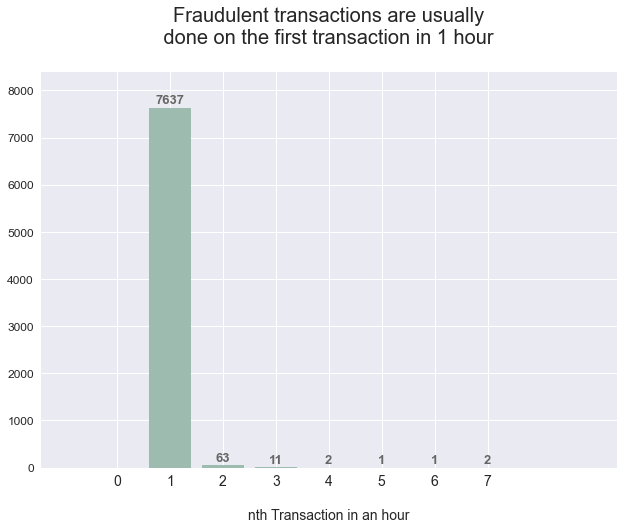

In [151]:
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])

# ax.bar([0, 1],[mean_nonfraud, mean_fraud], color=['#6c8ead'])
ax.bar(df.query('isFraud == 1').groupby('nthTransactionForTheHour').size().index, df.query('isFraud == 1').groupby('nthTransactionForTheHour').size(),
      color=['#9DBBAE'])

plt.yticks(fontsize=12)
plt.xticks([0, 1, 2,3,4,5,6,7], [0, 1, 2,3,4,5,6,7], fontsize=14)
plt.xlabel("\nnth Transaction in an hour", fontsize=14)
plt.margins(0.3, 0.1)
plt.subplots_adjust(wspace=5, hspace=10)
plt.title("Fraudulent transactions are usually\n done on the first transaction in 1 hour \n", fontsize=20)

labels = pd.DataFrame(
    df.query('isFraud == 1').groupby('nthTransactionForTheHour').size().index, df.query('isFraud == 1').groupby('nthTransactionForTheHour').size().tolist()
).index.tolist()
rects = ax.patches
for rect, label in zip(rects, labels):
    height = rect.get_height()
    label = round(label, 2)
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 15, label, ha="center", va="bottom", fontsize=13
        ,fontweight="bold", color="#666"
    )
plt.show()

The assumption that multiple successive transfers of the same amount in the same hour is potentially
fraudulent is not supported by the training data

In [152]:
df.query('isFraud == 1').groupby('nthTransactionForTheHour').size().index, df.query('isFraud == 1').groupby('nthTransactionForTheHour').size()

(Float64Index([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0], dtype='float64', name='nthTransactionForTheHour'),
 nthTransactionForTheHour
 1.0    7637
 2.0      63
 3.0      11
 4.0       2
 5.0       1
 6.0       1
 7.0       2
 dtype: int64)

In [153]:
pd.DataFrame(
    df.query('isFraud == 1').groupby('nthTransactionForTheHour').size().index, df.query('isFraud == 1').groupby('nthTransactionForTheHour').size().tolist()
).index.tolist()

[7637, 63, 11, 2, 1, 1, 2]

In [154]:
df_culprit[(df_culprit.duplicated(subset=['nameDest', 'step'], keep=False)) & (df_culprit['isFraud']==1)].sort_values('nameDest')

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,rn,rn2,cumsum,prev_step,diff,nthTransactionForTheHour
347735,16,CASH_OUT,121626.82,C828364266,121626.82,0.0,C101179743,653744.34,775371.16,1,1.0,6.0,904693.94,16.0,0.0,3.0
49826,9,CASH_OUT,2539898.07,C728718059,2539898.07,0.0,C1013511446,968.00,1842864.22,1,1.0,1.0,2539898.07,NaN,NaN,1.0
3106112,235,CASH_OUT,309958.79,C587256083,309958.79,0.0,C104306099,0.00,247510.12,1,1.0,2.0,309958.79,229.0,6.0,1.0
5033185,354,CASH_OUT,9299230.13,C1363018209,9299230.13,0.0,C1049795740,11291600.74,20590830.88,1,1.0,52.0,9299230.13,350.0,4.0,1.0
4586529,328,CASH_OUT,342120.59,C870356100,342120.59,0.0,C1052706087,136141.99,487983.30,1,1.0,12.0,342120.59,251.0,77.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626938,34,CASH_OUT,71693.42,C1845753498,71693.42,0.0,C967051629,0.00,71693.42,1,1.0,2.0,322175.46,34.0,0.0,2.0
338008,16,CASH_OUT,2701905.30,C2140905252,2701905.30,0.0,C970796050,57418.00,2759323.30,1,1.0,2.0,2719060.30,16.0,0.0,2.0
848429,41,CASH_OUT,1783144.33,C229433868,1783144.33,0.0,C978822470,1793786.80,3576931.13,1,1.0,14.0,2083859.34,41.0,0.0,2.0
5010003,353,CASH_OUT,174566.53,C482336380,174566.53,0.0,C985066734,1191715.74,1366282.27,1,1.0,10.0,725050.80,353.0,0.0,2.0


In [155]:
_ = df_culprit[(df_culprit.duplicated(subset=['nameDest', 'step'], keep=False))].sort_values("nameDest")
_

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,rn,rn2,cumsum,prev_step,diff,nthTransactionForTheHour
3472350,258,CASH_OUT,204898.53,C1165602651,200134.00,0.00,C1001258143,72809.55,551717.33,0,1.0,2.0,204898.53,237.0,21.0,1.0
3473418,258,TRANSFER,274009.25,C2055801845,0.00,0.00,C1001258143,277708.08,551717.33,0,1.0,3.0,478907.78,258.0,0.0,2.0
473309,19,TRANSFER,657792.79,C874871997,51052.00,0.00,C1002469873,308094.85,1017765.39,0,1.0,15.0,925639.99,19.0,0.0,5.0
460617,19,CASH_OUT,131104.46,C2083328673,0.00,0.00,C1002469873,176990.38,1017765.39,0,1.0,14.0,267847.20,19.0,0.0,4.0
459727,19,CASH_OUT,19683.13,C1424293697,70699.00,51015.87,C1002469873,157307.25,1017765.39,0,1.0,13.0,136742.74,19.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2243438,186,CASH_IN,165065.59,C1717585305,8152923.48,8317989.08,C995043220,1236006.45,1070940.86,0,1.0,5.0,655080.17,186.0,0.0,2.0
3118718,236,CASH_IN,130400.06,C2057849626,8254230.13,8384630.19,C997146902,656689.64,422769.88,0,1.0,9.0,130400.06,235.0,1.0,1.0
3121862,236,CASH_IN,103519.70,C861262486,8359578.75,8463098.45,C997146902,526289.58,422769.88,0,1.0,10.0,233919.76,236.0,0.0,2.0
3080984,235,CASH_OUT,161883.80,C1404100994,1563.00,0.00,C997289329,0.00,161883.80,0,1.0,2.0,161883.80,163.0,72.0,1.0


In [156]:
df.groupby(['nameDest', 'step'])['isFraud']

In [157]:
df.loc[(df["isFraud"]==1)]

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,rn,rn2,cumsum,prev_step,diff,nthTransactionForTheHour
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,1.0,1.0,181.00,NaN,NaN,1.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,1.0,1.0,181.00,NaN,NaN,1.0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,1.0,1.0,2806.00,NaN,NaN,1.0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,1.0,1.0,2806.00,NaN,NaN,1.0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,1.0,1.0,20128.00,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6351186,699,CASH_OUT,62372.43,C1915659563,62372.43,0.0,C421781202,1195387.47,1257759.90,1,1.0,9.0,62372.43,348.0,351.0,1.0
6351188,699,TRANSFER,162326.52,C1557504343,162326.52,0.0,C404511346,0.00,0.00,1,1.0,1.0,162326.52,NaN,NaN,1.0
6351189,699,CASH_OUT,162326.52,C1532317723,162326.52,0.0,C446134087,0.00,162326.52,1,1.0,1.0,162326.52,NaN,NaN,1.0
6351190,699,TRANSFER,2763398.31,C577803442,2763398.31,0.0,C619602282,0.00,0.00,1,1.0,1.0,2763398.31,NaN,NaN,1.0


In [158]:
df_culprit["prev_step"] = df_culprit.groupby("nameDest")["step"].shift()
df_culprit["diff"] = df_culprit["step"] - df_culprit["prev_step"]
df_culprit

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,rn,rn2,cumsum,prev_step,diff,nthTransactionForTheHour
3165860,237,CASH_OUT,72809.55,C1650985602,21369.00,0.00,C1001258143,0.00,72809.55,0,1.0,1.0,72809.55,NaN,NaN,1.0
3472350,258,CASH_OUT,204898.53,C1165602651,200134.00,0.00,C1001258143,72809.55,551717.33,0,1.0,2.0,204898.53,237.0,21.0,1.0
3473418,258,TRANSFER,274009.25,C2055801845,0.00,0.00,C1001258143,277708.08,551717.33,0,1.0,3.0,478907.78,258.0,0.0,2.0
3607015,264,CASH_IN,304705.24,C755335848,11574617.47,11879322.71,C1001258143,551717.33,247012.09,0,1.0,4.0,304705.24,258.0,6.0,1.0
4140457,303,CASH_OUT,407097.38,C318179352,9959.00,0.00,C1001258143,247012.09,654109.48,0,1.0,5.0,407097.38,264.0,39.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4914502,349,CASH_IN,23377.58,C706021317,5339.00,28716.58,C998349190,144563.84,121186.27,0,1.0,2.0,23377.58,303.0,46.0,1.0
5169273,358,CASH_OUT,123557.50,C1086731705,130234.00,6676.50,C998349190,121186.27,244743.77,0,1.0,3.0,123557.50,349.0,9.0,1.0
5315613,374,TRANSFER,747046.52,C652973324,10830.00,0.00,C998349190,244743.77,991790.29,0,1.0,4.0,747046.52,358.0,16.0,1.0
5761013,400,CASH_OUT,171444.38,C412195467,0.00,0.00,C998349190,991790.29,1163234.67,0,1.0,5.0,171444.38,374.0,26.0,1.0


(array([1581.,  483.,  264.,  181.,  170.,  119.,   51.,   23.,    7.,
           3.]),
 array([  0. ,  53.8, 107.6, 161.4, 215.2, 269. , 322.8, 376.6, 430.4,
        484.2, 538. ]),
 <BarContainer object of 10 artists>)

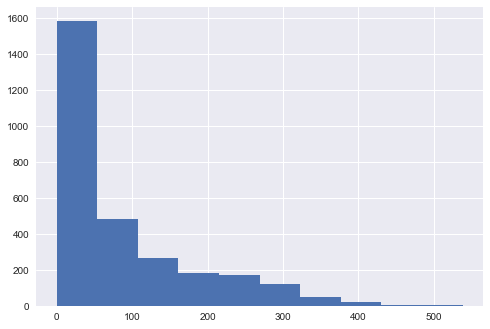

In [159]:
df_culprit.fillna(1, inplace=True)
plt.hist(df_culprit.loc[df_culprit["isFraud"]==1,"diff"])

(array([2.4039e+04, 6.7650e+03, 2.2830e+03, 1.1130e+03, 8.0800e+02,
        8.9300e+02, 2.8000e+02, 2.4200e+02, 1.5200e+02, 1.0900e+02,
        1.0500e+02, 1.0500e+02, 5.0000e+01, 5.6000e+01, 4.1000e+01,
        2.1000e+01, 2.0000e+01, 5.0000e+01, 2.2000e+01, 7.0000e+00,
        1.8000e+01, 8.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([  0.  ,  16.64,  33.28,  49.92,  66.56,  83.2 ,  99.84, 116.48,
        133.12, 149.76, 166.4 , 183.04, 199.68, 216.32, 232.96, 249.6 ,
        266.24, 282.88, 299.52, 316.16, 332.8 , 349.44, 366.08, 382.72,
        399.36, 416.  ]),
 <BarContainer object of 25 artists>)

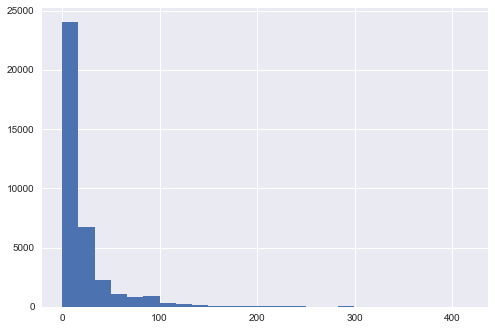

In [160]:
plt.hist(df_culprit.loc[df_culprit["isFraud"]==0,"diff"], bins=25)

In [161]:
# Daily cummulative transaction
#Multiple accounts is a limitation

In [162]:
df.sort_values('cumsum', ascending=False).head(30)

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,rn,rn2,cumsum,prev_step,diff,nthTransactionForTheHour
4147080,303,TRANSFER,39552821.21,C2054597055,0.00,0.0,C1496190878,1.147095e+08,1.542623e+08,0,1.0,19.0,1.056878e+08,303.0,0.0,3.0
4153595,303,TRANSFER,19712162.15,C1418395176,135212.13,0.0,C1789550256,1.394221e+08,1.591343e+08,0,1.0,96.0,1.024168e+08,303.0,0.0,3.0
3920261,284,TRANSFER,36090712.11,C120440051,0.00,0.0,C65111466,1.302114e+08,1.663021e+08,0,1.0,11.0,1.003252e+08,284.0,0.0,2.0
3980217,297,TRANSFER,48464778.69,C1275690114,0.00,0.0,C707403537,2.629401e+08,3.114049e+08,0,1.0,10.0,9.904545e+07,297.0,0.0,3.0
3684267,276,TRANSFER,58944752.64,C24299338,0.00,0.0,C1320946922,9.106990e+07,1.500147e+08,0,1.0,11.0,9.771655e+07,276.0,0.0,2.0
4131403,302,TRANSFER,35894320.06,C2027396203,0.00,0.0,C1406193485,1.503281e+08,2.362512e+08,0,1.0,41.0,9.421269e+07,302.0,0.0,2.0
3686583,276,TRANSFER,92445516.64,C1715283297,0.00,0.0,C439737079,9.595980e+03,9.245511e+07,0,1.0,3.0,9.244552e+07,180.0,96.0,1.0
4182832,304,TRANSFER,25941019.63,C2128717602,241408.49,0.0,C1831361991,5.957775e+07,8.551877e+07,0,1.0,12.0,8.445092e+07,304.0,0.0,7.0
4110501,302,TRANSFER,41708576.34,C1495660404,0.00,0.0,C735186749,1.534393e+08,1.951479e+08,0,1.0,30.0,8.348983e+07,302.0,0.0,2.0
4164131,304,TRANSFER,32234897.52,C147746764,0.00,0.0,C2081696688,5.078154e+07,8.301644e+07,0,1.0,7.0,8.283031e+07,304.0,0.0,7.0


In [163]:
df.loc[df['isFraud']==1].groupby(['type']).size()

type
CASH_OUT    3868
TRANSFER    3849
dtype: int64

In [164]:
df.loc[df['isFraud']==0].groupby(['type']).size()

type
CASH_IN     1396865
CASH_OUT    2229501
DEBIT         41310
PAYMENT     2147832
TRANSFER     527968
dtype: int64

-----------------------------------------------------------------------

In [28]:
todrop = ["CASH_IN", "DEBIT", "PAYMENT"]
df_ = df.query('type not in @todrop')

In [29]:
df_.shape

(2765186, 18)

In [30]:
df_['isFraud'].value_counts()

0    2757469
1       7717
Name: isFraud, dtype: int64

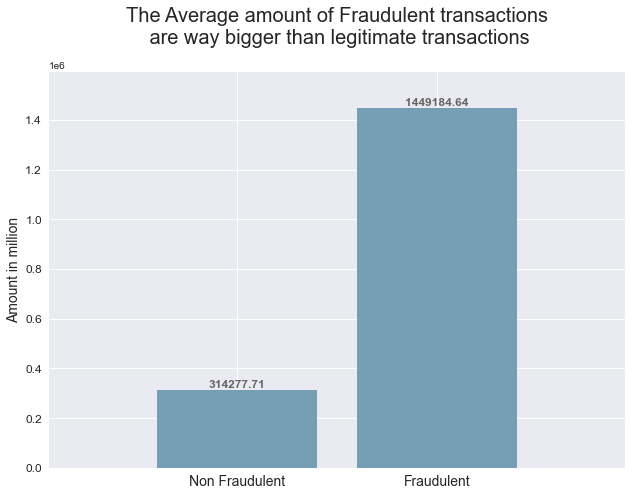

In [31]:
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
mean_fraud = df_.loc[df_["isFraud"]==1, "amount"].mean()
mean_nonfraud = df_.loc[df_["isFraud"]==0, "amount"].mean()

ax.bar([0, 1],[mean_nonfraud, mean_fraud], color=['#769FB6'])
plt.xticks([0, 1], ["Non Fraudulent", "Fraudulent"], fontsize=14)
plt.yticks(fontsize=12)
plt.ylabel("Amount in million", fontsize=14)
plt.margins(0.3, 0.1)
plt.subplots_adjust(wspace=5, hspace=10)
plt.title("The Average amount of Fraudulent transactions\n are way bigger than legitimate transactions\n", fontsize=20)

rects = ax.patches

# Make some labels.
labels = [mean_nonfraud, mean_fraud]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    label = round(label, 2)
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom", fontsize=12
         ,fontweight="bold", color="#666"
    )
plt.show()

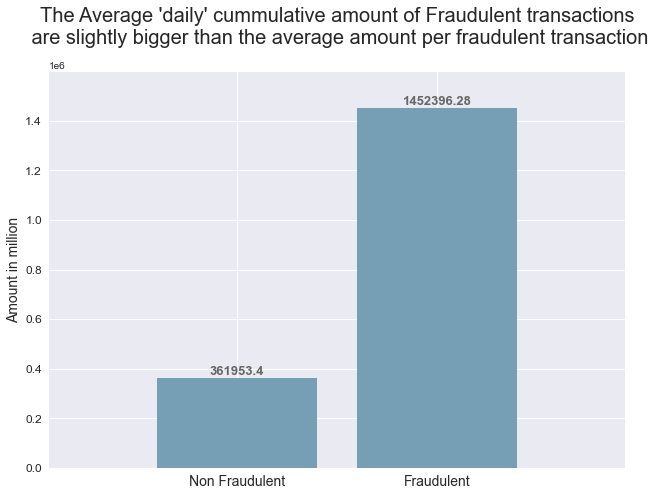

In [32]:
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
mean_fraud = df_.loc[df_["isFraud"]==1, "cumsum"].mean()
mean_nonfraud = df_.loc[df_["isFraud"]==0, "cumsum"].mean()

ax.bar([0, 1],[mean_nonfraud, mean_fraud], color=['#769FB6'])
plt.xticks([0, 1], ["Non Fraudulent", "Fraudulent"], fontsize=14)
plt.yticks(fontsize=12)
plt.ylabel("Amount in million", fontsize=14)
plt.margins(0.3, 0.1)
plt.subplots_adjust(wspace=5, hspace=10)
plt.title("The Average 'daily' cummulative amount of Fraudulent transactions\n are slightly bigger than the average amount per fraudulent transaction\n", fontsize=20)

labels = [mean_nonfraud, mean_fraud]

rects = ax.patches
for rect, label in zip(rects, labels):
    height = rect.get_height()
    label = round(label, 2)
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 15, label, ha="center", va="bottom", fontsize=13
        ,fontweight="bold", color="#666"
    )
plt.show()

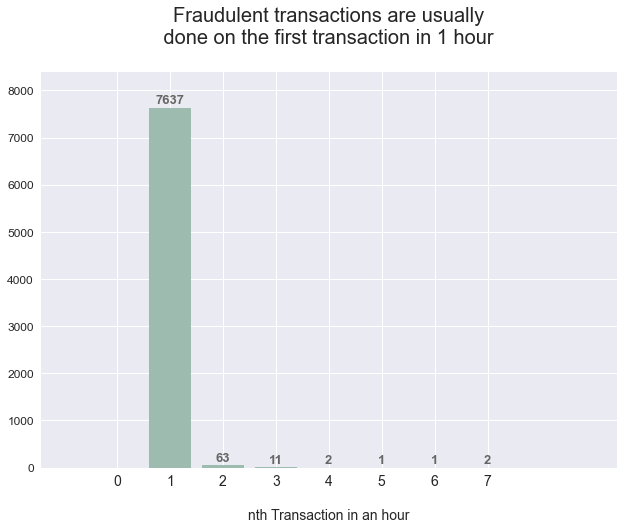

In [33]:
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])

# ax.bar([0, 1],[mean_nonfraud, mean_fraud], color=['#6c8ead'])
ax.bar(df_.query('isFraud == 1').groupby('nthTransactionForTheHour').size().index, df_.query('isFraud == 1').groupby('nthTransactionForTheHour').size(),
      color=['#9DBBAE'])

plt.yticks(fontsize=12)
plt.xticks([0, 1, 2,3,4,5,6,7], [0, 1, 2,3,4,5,6,7], fontsize=14)
plt.xlabel("\nnth Transaction in an hour", fontsize=14)
plt.margins(0.3, 0.1)
plt.subplots_adjust(wspace=5, hspace=10)
plt.title("Fraudulent transactions are usually\n done on the first transaction in 1 hour \n", fontsize=20)

labels = pd.DataFrame(
    df_.query('isFraud == 1').groupby('nthTransactionForTheHour').size().index, df_.query('isFraud == 1').groupby('nthTransactionForTheHour').size().tolist()
).index.tolist()
rects = ax.patches
for rect, label in zip(rects, labels):
    height = rect.get_height()
    label = round(label, 2)
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 15, label, ha="center", va="bottom", fontsize=13
        ,fontweight="bold", color="#666"
    )
plt.show()

In [34]:
df_.corr()

,step,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,rn,_rn,_rn2,rn2,cumsum,prev_step,diff,nthTransactionForTheHour
step,1.000000,0.037081,-0.000241,-0.015578,0.038832,0.038549,0.039430,0.020317,NaN,-0.004645,0.032924,0.006974,0.944738,0.579186,-0.253688
amount,0.037081,1.000000,0.113601,0.010012,0.307905,0.497903,0.067461,0.000955,NaN,-0.016565,0.087161,0.847538,0.046590,-0.009629,0.028199
oldbalanceOrig,-0.000241,0.113601,1.000000,0.762547,-0.021122,-0.010880,0.348325,-0.000272,NaN,-0.015106,-0.037194,0.081378,-0.026075,0.017290,0.016154
newbalanceOrig,-0.015578,0.010012,0.762547,1.000000,-0.012941,-0.016331,0.053834,-0.000594,NaN,-0.006699,-0.020543,0.008795,-0.030256,-0.002772,0.027706
oldbalanceDest,0.038832,0.307905,-0.021122,-0.012941,1.000000,0.970040,-0.014455,0.001867,NaN,0.047143,0.405576,0.321551,0.068605,-0.044218,0.049801
newbalanceDest,0.038549,0.497903,-0.010880,-0.016331,0.970040,1.000000,-0.008743,0.001871,NaN,0.043808,0.383745,0.486123,0.067950,-0.044066,0.059930
isFraud,0.039430,0.067461,0.348325,0.053834,-0.014455,-0.008743,1.000000,0.001040,NaN,NaN,-0.030821,0.046820,0.014099,0.040227,-0.010359
rn,0.020317,0.000955,-0.000272,-0.000594,0.001867,0.001871,0.001040,1.000000,NaN,-0.003392,0.001315,0.000928,0.020295,0.008538,-0.005825
_rn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
_rn2,-0.004645,-0.016565,-0.015106,-0.006699,0.047143,0.043808,NaN,-0.003392,NaN,1.000000,0.099816,-0.016597,0.006685,-0.024765,0.004325


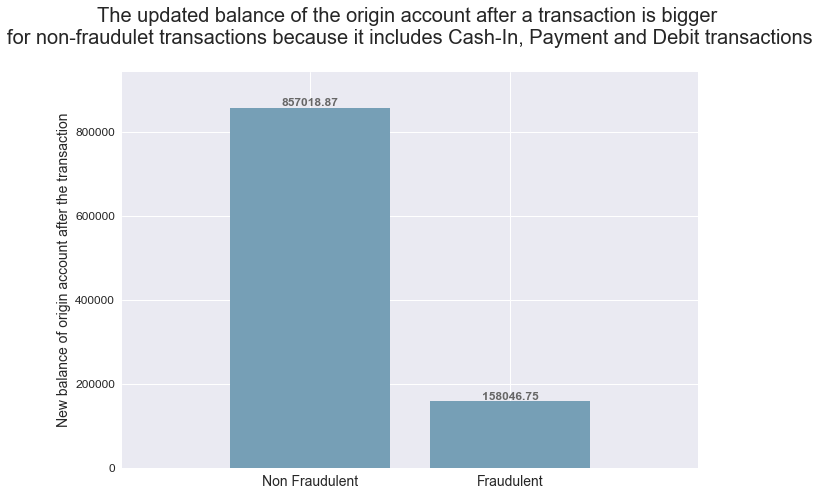

In [35]:
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
mean_fraud = df.loc[df["isFraud"]==1, "newbalanceOrig"].mean()
mean_nonfraud = df.loc[df["isFraud"]==0, "newbalanceOrig"].mean()

ax.bar([0, 1],[mean_nonfraud, mean_fraud], color=['#769FB6'])
plt.xticks([0, 1], ["Non Fraudulent", "Fraudulent"], fontsize=14)
plt.yticks(fontsize=12)
plt.ylabel("New balance of origin account after the transaction", fontsize=14)
plt.margins(0.3, 0.1)
plt.subplots_adjust(wspace=5, hspace=10)
plt.title("The updated balance of the origin account after a transaction is bigger \nfor non-fraudulet transactions because it includes Cash-In, Payment and Debit transactions\n", fontsize=20)

rects = ax.patches

# Make some labels.
labels = [mean_nonfraud, mean_fraud]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    label = round(label, 2)
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom", fontsize=12
         ,fontweight="bold", color="#666"
    )
plt.show()

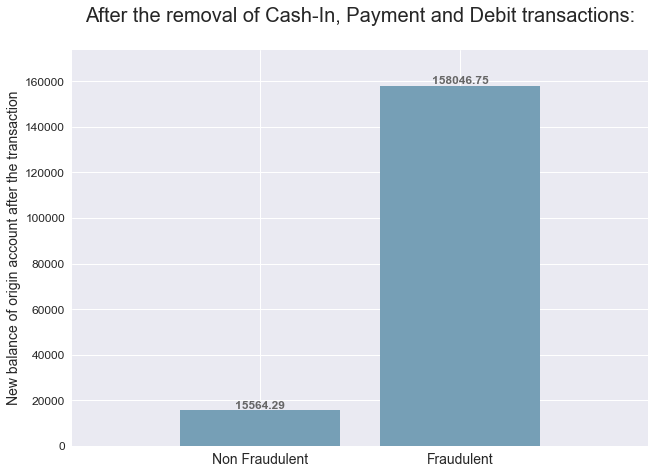

In [36]:
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
mean_fraud = df_.loc[df_["isFraud"]==1, "newbalanceOrig"].mean()
mean_nonfraud = df_.loc[df_["isFraud"]==0, "newbalanceOrig"].mean()

ax.bar([0, 1],[mean_nonfraud, mean_fraud], color=['#769FB6'])
plt.xticks([0, 1], ["Non Fraudulent", "Fraudulent"], fontsize=14)
plt.yticks(fontsize=12)
plt.ylabel("New balance of origin account after the transaction", fontsize=14)
plt.margins(0.3, 0.1)
plt.subplots_adjust(wspace=5, hspace=10)
plt.title("After the removal of Cash-In, Payment and Debit transactions:\n", fontsize=20)

rects = ax.patches

# Make some labels.
labels = [mean_nonfraud, mean_fraud]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    label = round(label, 2)
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom", fontsize=12
         ,fontweight="bold", color="#666"
    )
plt.show()

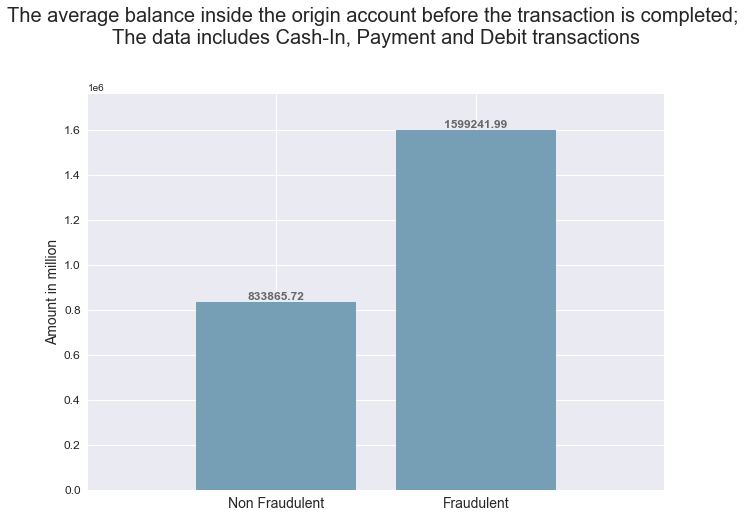

In [37]:
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
mean_fraud = df.loc[df["isFraud"]==1, "oldbalanceOrig"].mean()
mean_nonfraud = df.loc[df["isFraud"]==0, "oldbalanceOrig"].mean()

ax.bar([0, 1],[mean_nonfraud, mean_fraud], color=['#769FB6'])
plt.xticks([0, 1], ["Non Fraudulent", "Fraudulent"], fontsize=14)
plt.yticks(fontsize=12)
plt.ylabel("Amount in million", fontsize=14)
plt.margins(0.3, 0.1)
plt.subplots_adjust(wspace=5, hspace=10)
plt.title("The average balance inside the origin account before the transaction is completed; \nThe data includes Cash-In, Payment and Debit transactions\n\n", fontsize=20)

rects = ax.patches

# Make some labels.
labels = [mean_nonfraud, mean_fraud]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    label = round(label, 2)
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom", fontsize=12
         ,fontweight="bold", color="#666"
    )
plt.show()

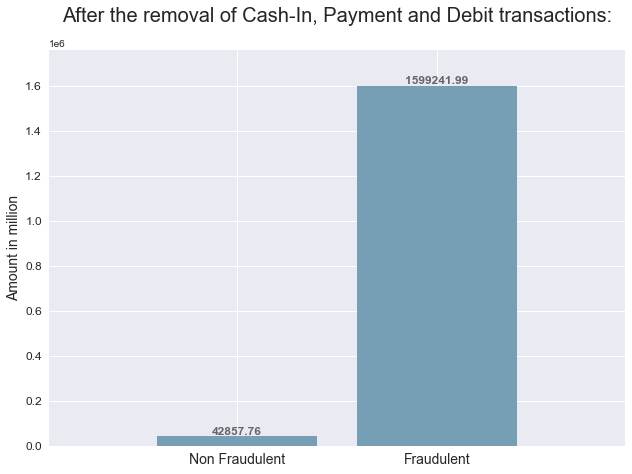

In [38]:
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
mean_fraud = df_.loc[df_["isFraud"]==1, "oldbalanceOrig"].mean()
mean_nonfraud = df_.loc[df_["isFraud"]==0, "oldbalanceOrig"].mean()

ax.bar([0, 1],[mean_nonfraud, mean_fraud], color=['#769FB6'])
plt.xticks([0, 1], ["Non Fraudulent", "Fraudulent"], fontsize=14)
plt.yticks(fontsize=12)
plt.ylabel("Amount in million", fontsize=14)
plt.margins(0.3, 0.1)
plt.subplots_adjust(wspace=5, hspace=10)
plt.title("After the removal of Cash-In, Payment and Debit transactions:\n", fontsize=20)

rects = ax.patches

# Make some labels.
labels = [mean_nonfraud, mean_fraud]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    label = round(label, 2)
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom", fontsize=12
         ,fontweight="bold", color="#666"
    )
plt.show()

In [39]:
df_.query('newbalanceOrig == 0 & isFraud == 1').shape

(7579, 18)

In [40]:
df_.query('newbalanceOrig != 0 & isFraud == 1').shape

(138, 18)

In [41]:
df.query('newbalanceOrig == 0 & isFraud == 0').shape

(3596103, 18)

In [42]:
df.query('newbalanceOrig != 0 & isFraud == 0').shape

(2747373, 18)

In [43]:
3596103/(2747373+3596103 )

0.566897864829945

In [44]:
7579/(138+7579)

0.9821174031359337

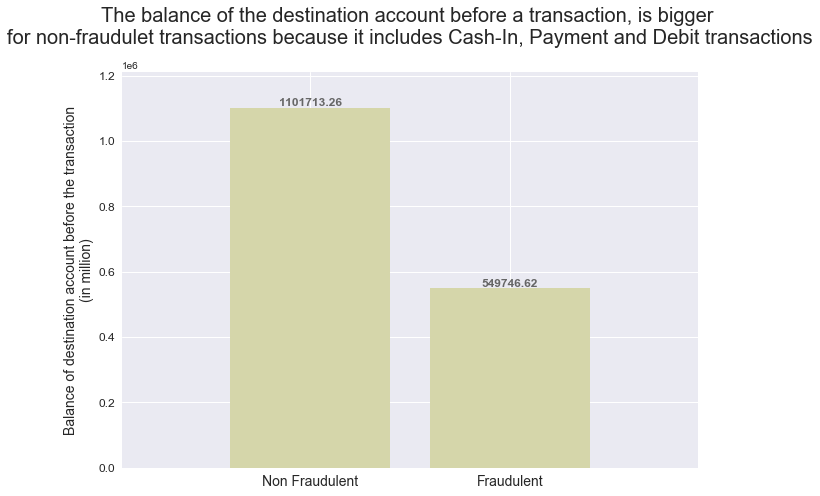

In [45]:
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
mean_fraud = df.loc[df["isFraud"]==1, "oldbalanceDest"].mean()
mean_nonfraud = df.loc[df["isFraud"]==0, "oldbalanceDest"].mean()

ax.bar([0, 1],[mean_nonfraud, mean_fraud], color=['#D5D6AA'])
plt.xticks([0, 1], ["Non Fraudulent", "Fraudulent"], fontsize=14)
plt.yticks(fontsize=12)
plt.ylabel("Balance of destination account before the transaction\n(in million)", fontsize=14)
plt.margins(0.3, 0.1)
plt.subplots_adjust(wspace=5, hspace=10)
plt.title("The balance of the destination account before a transaction, is bigger \nfor non-fraudulet transactions because it includes Cash-In, Payment and Debit transactions\n", fontsize=20)

rects = ax.patches

# Make some labels.
labels = [mean_nonfraud, mean_fraud]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    label = round(label, 2)
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom", fontsize=12
         ,fontweight="bold", color="#666"
    )
plt.show()

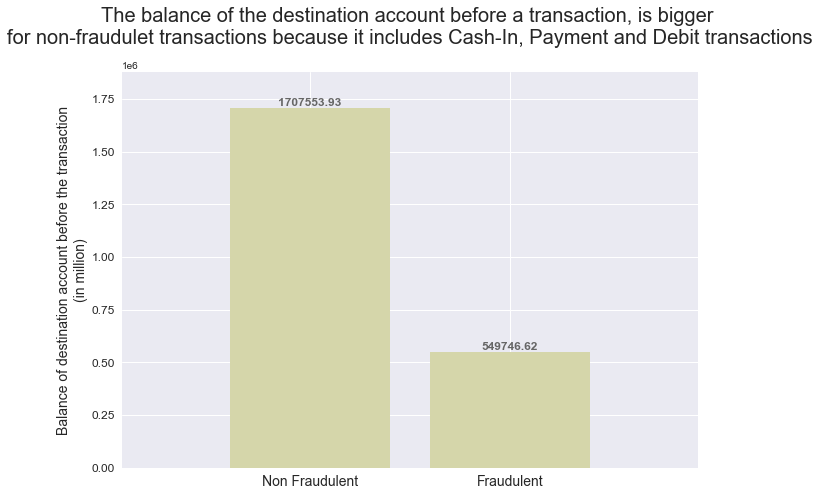

In [46]:
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
mean_fraud = df_.loc[df_["isFraud"]==1, "oldbalanceDest"].mean()
mean_nonfraud = df_.loc[df_["isFraud"]==0, "oldbalanceDest"].mean()

ax.bar([0, 1],[mean_nonfraud, mean_fraud], color=['#D5D6AA'])
plt.xticks([0, 1], ["Non Fraudulent", "Fraudulent"], fontsize=14)
plt.yticks(fontsize=12)
plt.ylabel("Balance of destination account before the transaction\n(in million)", fontsize=14)
plt.margins(0.3, 0.1)
plt.subplots_adjust(wspace=5, hspace=10)
plt.title("The balance of the destination account before a transaction, is bigger \nfor non-fraudulet transactions because it includes Cash-In, Payment and Debit transactions\n", fontsize=20)

rects = ax.patches

# Make some labels.
labels = [mean_nonfraud, mean_fraud]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    label = round(label, 2)
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom", fontsize=12
         ,fontweight="bold", color="#666"
    )
plt.show()

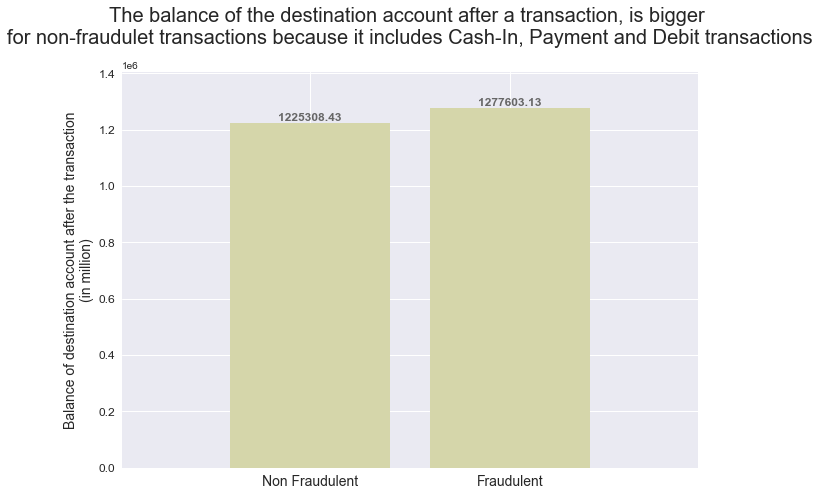

In [47]:
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
mean_fraud = df.loc[df["isFraud"]==1, "newbalanceDest"].mean()
mean_nonfraud = df.loc[df["isFraud"]==0, "newbalanceDest"].mean()

ax.bar([0, 1],[mean_nonfraud, mean_fraud], color=['#D5D6AA'])
plt.xticks([0, 1], ["Non Fraudulent", "Fraudulent"], fontsize=14)
plt.yticks(fontsize=12)
plt.ylabel("Balance of destination account after the transaction\n(in million)", fontsize=14)
plt.margins(0.3, 0.1)
plt.subplots_adjust(wspace=5, hspace=10)
plt.title("The balance of the destination account after a transaction, is bigger \nfor non-fraudulet transactions because it includes Cash-In, Payment and Debit transactions\n", fontsize=20)

rects = ax.patches

# Make some labels.
labels = [mean_nonfraud, mean_fraud]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    label = round(label, 2)
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom", fontsize=12
         ,fontweight="bold", color="#666"
    )
plt.show()

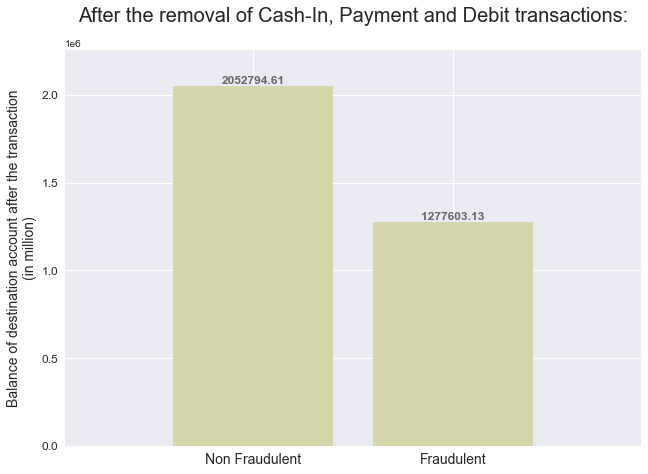

In [48]:
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
mean_fraud = df_.loc[df_["isFraud"]==1, "newbalanceDest"].mean()
mean_nonfraud = df_.loc[df_["isFraud"]==0, "newbalanceDest"].mean()

ax.bar([0, 1],[mean_nonfraud, mean_fraud], color=['#D5D6AA'])
plt.xticks([0, 1], ["Non Fraudulent", "Fraudulent"], fontsize=14)
plt.yticks(fontsize=12)
plt.ylabel("Balance of destination account after the transaction\n(in million)", fontsize=14)
plt.margins(0.3, 0.1)
plt.subplots_adjust(wspace=5, hspace=10)
plt.title("After the removal of Cash-In, Payment and Debit transactions:\n", fontsize=20)

rects = ax.patches

# Make some labels.
labels = [mean_nonfraud, mean_fraud]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    label = round(label, 2)
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom", fontsize=12
         ,fontweight="bold", color="#666"
    )
plt.show()

The balance of destination account for the fraudulent accounts is lower on average. Fraudsters are most likely opening new, empty accounts as their destination account.

In [49]:
df_.query('oldbalanceDest == 0 & isFraud == 1').shape

(5022, 18)

In [50]:
df_.query('oldbalanceDest != 0 & isFraud == 1').shape

(2695, 18)

In [51]:
5022/(5022+2695)

0.6507710250097188

In [52]:
df_.query('oldbalanceDest == 0 & isFraud == 0').shape

(382670, 18)

In [53]:
df_.query('oldbalanceDest != 0 & isFraud == 0').shape

(2374799, 18)

In [54]:
382670/(382670+2374799)

0.13877581216688203

In [55]:
mdf = df_.copy()

----------------

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import plot_confusion_matrix

In [57]:
mdf.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrig',
       'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest',
       'isFraud', 'rn', '_rn', '_rn2', 'rn2', 'cumsum', 'prev_step', 'diff',
       'nthTransactionForTheHour'],
      dtype='object')

In [58]:
SIGVARS = [
    'oldbalanceOrig', 
    'newbalanceOrig',
    'oldbalanceDest',
    'newbalanceDest',
    'cumsum',
    'nthTransactionForTheHour'
]
CLASS = 'isFraud'

In [59]:
X = mdf[SIGVARS]
y = mdf[CLASS]

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=2)

In [61]:
rf_baseline = RandomForestClassifier(random_state=1)

In [62]:
rf_baseline.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [63]:
preds = rf_baseline.predict(X_test)
ppreds = rf_baseline.predict_proba(X_test)
ff = pd.DataFrame({'predicted': preds, 'probability': [p[1] for p in ppreds]})
ff['pred_2'] = ff['probability'].apply(lambda x: 1 if x>0.25 else 0)

In [64]:
confusion_matrix(y_test, preds)

array([[1102948,      99],
       [    730,    2298]], dtype=int64)

In [65]:
confusion_matrix(y_test, ff['pred_2'])

array([[1102656,     391],
       [    547,    2481]], dtype=int64)

In [66]:
print(accuracy_score(y_test, preds))
print(f1_score(y_test, preds))
print(precision_score(y_test, preds))
print(recall_score(y_test, preds))

0.9992505029044143
0.8471889400921658
0.9586983729662077
0.7589167767503302


In [67]:
print(accuracy_score(y_test, ff['pred_2']))
print(f1_score(y_test, ff['pred_2']))
print(precision_score(y_test, ff['pred_2']))
print(recall_score(y_test, ff['pred_2']))

0.9991519562416653
0.8410169491525423
0.8638579387186629
0.8193527080581242


In [69]:
import pickle

pickle.dump(rf_baseline, open("rf_baseline20220115.pkl", "wb+"))

In [79]:
sdf = pd.DataFrame(y_test)
sdf['predicted'] = preds

In [80]:
ppreds = rf_baseline.predict_proba(X_test)

In [81]:
sdf['proba'] = pd.Series([p[1] for p in ppreds])

In [82]:
ff = pd.DataFrame({'predicted': preds, 'probability': [p[1] for p in ppreds]})

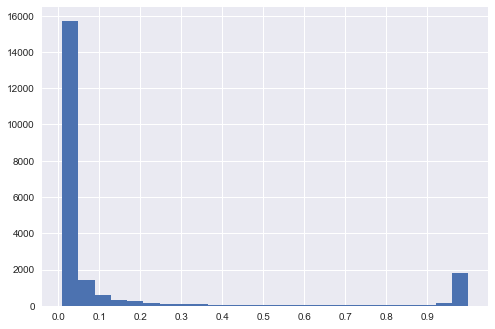

In [83]:
plt.hist(ff.query('probability > 0')['probability'], bins=25)
plt.xticks([i/100 for i in range(0, 100, 10)])
plt.show()

In [84]:
ff['pred_2'] = ff['probability'].apply(lambda x: 1 if x>0.25 else 0)

In [85]:
confusion_matrix(y_test, ff['pred_2'])

array([[1102656,     391],
       [    547,    2481]], dtype=int64)

In [86]:
print(accuracy_score(y_test, ff['pred_2']))
print(f1_score(y_test, ff['pred_2']))
print(precision_score(y_test, ff['pred_2']))
print(recall_score(y_test, ff['pred_2']))

0.9991519562416653
0.8410169491525423
0.8638579387186629
0.8193527080581242


In [87]:
rf_baseline.feature_importances_

array([0.36167899, 0.07563089, 0.12730978, 0.22614647, 0.19184191,
       0.01739196])

In [88]:
SIGVARS

['oldbalanceOrig',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'cumsum',
 'nthTransactionForTheDay']

-------------------------------KFOLD-----------------------------------

In [90]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [96]:
mdf2 = mdf.reset_index()
X = mdf2[SIGVARS]
y = mdf2[CLASS]

In [98]:
rf_kfold_baseline = RandomForestClassifier(random_state=1)
k = KFold(n_splits=10)
for train_index, test_index in k.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    rf_kfold_baseline.fit(X_train, y_train)
    
    preds = rf_baseline.predict(X_test)
    ppreds = rf_baseline.predict_proba(X_test)
    ff = pd.DataFrame({'predicted': preds, 'probability': [p[1] for p in ppreds]})
    ff['pred_2'] = ff['probability'].apply(lambda x: 1 if x>0.25 else 0)
    
    print("====Raw prediction====")
    print(accuracy_score(y_test, preds))
    print(f1_score(y_test, preds))
    print(precision_score(y_test, preds))
    print(recall_score(y_test, preds))
    
    print("====Probability cutoff====")
    print(accuracy_score(y_test, ff['pred_2']))
    print(f1_score(y_test, ff['pred_2']))
    print(precision_score(y_test, ff['pred_2']))
    print(recall_score(y_test, ff['pred_2']))
    

====Raw prediction====
0.9997468528383221
0.9033149171270718
0.9589442815249267
0.8537859007832899
====Probability cutoff====
0.9995913481532914
0.8571428571428572
0.8308823529411765
0.8851174934725848
====Raw prediction====
0.9995804989892195
0.9476061427280941
0.9886899151743638
0.9098005203816132
====Probability cutoff====
0.9994973220646682
0.939061814993424
0.949468085106383
0.9288811795316565
====Raw prediction====
0.9998444953149693
0.9355322338830585
0.9719626168224299
0.9017341040462428
====Probability cutoff====
0.9997215381221544
0.8932038834951457
0.8586666666666667
0.930635838150289
====Raw prediction====
0.9998227969868255
0.9361147327249021
0.9728997289972899
0.9020100502512562
====Probability cutoff====
0.9997396200622742
0.9108910891089109
0.8975609756097561
0.9246231155778895
====Raw prediction====
0.9998517280910173
0.9456953642384106
0.970108695652174
0.9224806201550387
====Probability cutoff====
0.9997902494946098
0.9258312020460358
0.9164556962025316
0.93540051679

In [102]:
recall_cutoff = [0.930783242258652, 0.9340425531914893, 0.9192546583850931, 0.9364035087719298, 0.9057017543859649, 0.9448818897637795, 0.9354005167958657, 0.9246231155778895, 0.930635838150289, 0.9288811795316565, 0.8851174934725848]
acc_cutoff = [0.999001873295771, 
              0.9997577011261473,
              0.9997432355217382,
              0.9997432355217382,
              0.9997468528383221,
              0.9997902494946098,
              0.9997396200622742,
              0.9997215381221544,
              0.9994973220646682,
              0.9995913481532914
              ]
print(sum(acc_cutoff) / len(acc_cutoff))
print(sum(recall_cutoff) / len(recall_cutoff))

0.9996332976200716
0.925065977298654


In [104]:
recall_raw = [0.9034608378870674
              ,0.9212765957446809
              ,0.9037267080745341
              ,0.9057017543859649
              ,0.9232283464566929
              ,0.9354005167958657
              ,0.9224806201550387
              ,0.9020100502512562
              ,0.9017341040462428
              ,0.9098005203816132
              ,0.8537859007832899
              ]
acc_raw = [
    0.9988282860428616,
    0.9998408783514997,
    0.9998372619503975,
    0.999819179944886,
    0.9998264133748495,
    0.9998517280910173,
    0.9998227969868255,
    0.9998444953149693,
    0.9995804989892195,
    0.9997468528383221,
]
print(sum(acc_raw) / len(acc_raw))
print(sum(recall_raw) / len(recall_raw))

0.9996998391884848
0.9075096322692953


In [200]:
feat = pd.DataFrame({"feature": X.columns.tolist(), "score":rf_baseline.feature_importances_})
feat = feat.sort_values('score')

Text(0.5, 1.0, 'Feature Importance:\n')

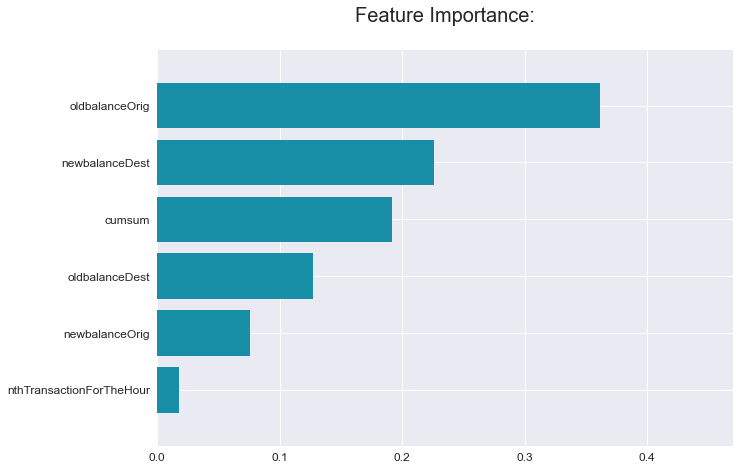

In [201]:
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])

ax.barh(feat['feature'], feat['score'], color='#188FA7')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.margins(0.3, 0.1)
plt.subplots_adjust(wspace=5, hspace=10)
plt.title("Feature Importance:\n", fontsize=20)

